In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50

In [2]:
train_path = 'seg_train/seg_train/'
test_path = 'seg_test/seg_test/'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range= 0.2, zoom_range = 0.2, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = (150, 150),
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 color_mode = 'rgb',
                                                 class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


In [6]:
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (150, 150, 3))
resnet = base_model.output
resnet = GlobalAveragePooling2D()(resnet)
resnet = Dropout(0.25)(resnet)
predictions = Dense(6, activation= 'softmax')(resnet)
Resnet50 = Model(inputs = base_model.input, outputs = predictions)

In [7]:
adam = Adam(learning_rate = 0.0001)
Resnet50.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = Resnet50.fit(train_generator,
                      batch_size = 128,
                      epochs = 5,
                      validation_data= test_generator)

Epoch 1/5


C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 1187s 3s/step - accuracy: 0.8104 - loss: 0.5392 - val_accuracy: 0.3160 - val_loss: 1.8276
Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1188s 3s/step - accuracy: 0.9326 - loss: 0.1999 - val_accuracy: 0.8907 - val_loss: 0.3133
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1120s 3s/step - accuracy: 0.9470 - loss: 0.1459 - val_accuracy: 0.9130 - val_loss: 0.2492
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1125s 3s/step - accuracy: 0.9528 - loss: 0.1336 - val_accuracy: 0.9213 - val_loss: 0.2329
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1146s 3s/step - accuracy: 0.9621 - loss: 0.1026 - val_accuracy: 0.9200 - val_loss: 0.2645


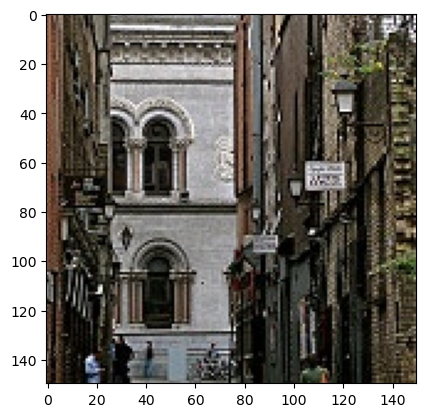

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predict Street


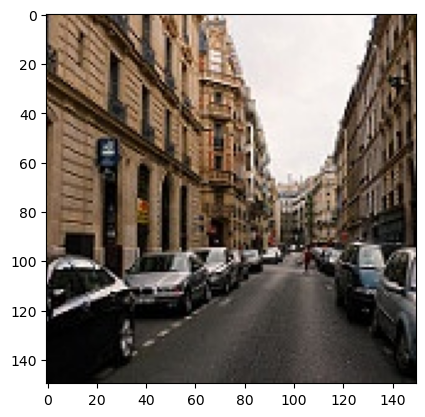

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict Street


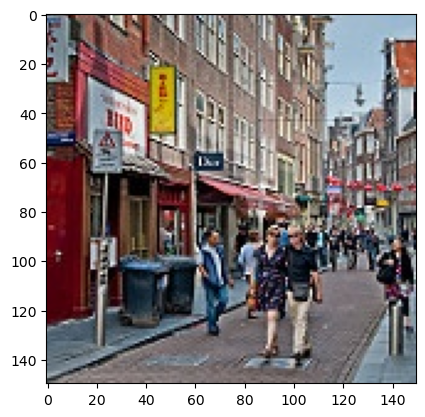

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict Street


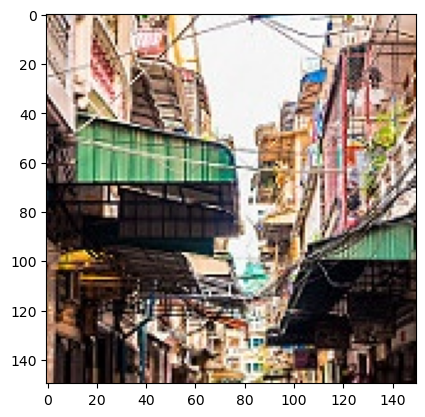

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predict Street


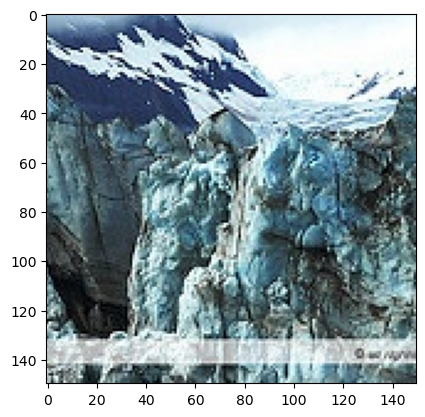

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict Glacier


In [9]:
path = "seg_pred/seg_pred"
pred_list = os.listdir("seg_pred/seg_pred")

for i in range(20, 25):
    pred_path = os.path.join(path, pred_list[i])
    img = cv2.imread(pred_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.show()
    img_res = np.expand_dims(img/255, 0)
    if (np.argmax(Resnet50.predict(img_res))) == 0:
        print('Predict Building')
    elif (np.argmax(Resnet50.predict(img_res))) == 1:
        print('Predict Forest')
    elif (np.argmax(Resnet50.predict(img_res))) == 2:
        print('Predict Glacier')
    elif (np.argmax(Resnet50.predict(img_res))) == 3:
        print('Predict Mountain')
    elif (np.argmax(Resnet50.predict(img_res))) == 4:
        print('Predict Sea')
    else:
        print('Predict Street')